In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
RANDOM_STATE = 42

In [19]:
train_df = pd.read_csv('train.csv', low_memory=False)
test_df = pd.read_csv('test.csv', low_memory=False)
df = pd.concat([train_df, test_df], keys=['train_df', 'test_df'])
target = train_df['SalePrice']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


## 1. Data analysis and clean

In [20]:
train_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [21]:
test_df.head().T

,0,1,2,3,4
Id,1461,1462,1463,1464,1465
MSSubClass,20,20,60,60,120
MSZoning,RH,RL,RL,RL,RL
LotFrontage,80,81,74,78,43
LotArea,11622,14267,13830,9978,5005
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,IR1,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,HLS
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [22]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2919 entries, (train_df, 0) to (test_df, 1458)
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null obje

In [24]:
print('total rows in df: ', df.shape[0])
print('rows in train df: ', train_df.shape[0])
print('rows in test df: ', test_df.shape[0])

total rows in df:  2919
rows in train df:  1460
rows in test df:  1459


We check for missing data in df:

In [0]:
# nans = pd.concat([train_df.isnull().sum(), train_df.isnull().sum() / train_df.shape[0], test_df.isnull().sum(), test_df.isnull().sum() / test_df.shape[0]], axis=1, keys=['Train', 'Percentage', 'Test', 'Percentage'])
# print(nans[nans.sum(axis=1) > 0])

In [26]:
#missing data

def missing_data_total(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data.head(25)

print("missing training data",missing_data_total(train_df))
print("missing testing data" ,missing_data_total(test_df))    

missing training data               Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000
YearRemodAdd      0  0.000000
MSSubClass        0  0.000000
Foundation        0  0.000000
ExterCond         0  0.000000
ExterQual         0  0.000000
missing testing data               Total   Percent
PoolQC         1456  0.997944
MiscFeature    1408  0.965045
Alley          1352  0.926662
Fence          1169  0.801234
FireplaceQu     730  0.5003

Labels "SalePrice"

In [27]:
print(target.describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [28]:
df.corr()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,Id,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1stFlrSF,1.000000,-0.249823,0.044086,0.108418,0.458092,0.084330,0.261816,0.011074,0.296600,-0.065796,0.407545,0.373077,0.492011,0.440540,0.260450,0.562538,-0.104141,-0.008678,0.076071,0.332460,0.458247,-0.012704,-0.248641,0.395834,0.093062,0.040143,0.238502,-0.157418,0.479152,0.121900,0.605852,0.098381,0.391782,0.801670,0.227347,0.310814,0.242245,-0.013442
2ndFlrSF,-0.249823,1.000000,-0.032458,0.503506,-0.162301,-0.097744,-0.161468,-0.060282,-0.000376,0.054645,0.169991,0.402865,0.128570,0.182452,0.086094,0.655085,0.611362,-0.022252,0.069032,0.031515,0.026545,0.017803,0.309309,0.121014,-0.005299,0.014185,0.185387,0.005494,0.245596,0.044503,0.319334,0.011070,0.584586,-0.205665,0.089922,0.017588,0.158985,-0.019229
3SsnPorch,0.044086,-0.032458,1.000000,-0.048279,0.050908,-0.023279,0.027378,0.026861,-0.005810,-0.032822,0.018852,0.015192,0.029440,0.023383,0.020699,0.006268,-0.023417,-0.046538,-0.021462,0.015995,0.028289,-0.004545,-0.037529,0.013612,-0.000788,0.027391,-0.009392,0.043739,0.018715,-0.006525,0.044584,-0.029546,-0.025764,0.037892,-0.003935,0.015958,0.037433,0.022560
BedroomAbvGr,0.108418,0.503506,-0.048279,1.000000,-0.113547,-0.031223,-0.155200,0.018848,0.183259,0.049940,0.086793,0.356125,0.073912,0.092876,-0.045364,0.517058,0.245318,0.003074,0.241182,0.132801,0.234892,0.070365,-0.008796,0.078126,0.000245,0.055997,0.086212,-0.008477,0.073075,0.036544,0.168213,0.007254,0.669737,0.053393,0.031644,-0.053101,-0.021912,-0.020453
BsmtFinSF1,0.458092,-0.162301,0.050908,-0.113547,1.000000,-0.055045,0.638847,0.078361,-0.477404,-0.099712,0.293089,0.081525,0.310449,0.255482,0.194270,0.211669,-0.007311,-0.016947,-0.086354,0.194031,0.219408,-0.066028,-0.064311,0.303490,0.093295,-0.000942,0.124163,-0.050418,0.281810,0.084462,0.386420,0.096823,0.052141,0.536467,0.223492,0.279581,0.152126,0.022556
BsmtFinSF2,0.084330,-0.097744,-0.023279,-0.031223,-0.055045,1.000000,0.162835,0.099485,-0.238241,0.032740,0.065625,-0.075432,0.003139,-0.014827,-0.068549,-0.017872,-0.032448,0.018251,-0.037779,0.084059,0.047431,-0.004923,-0.072530,-0.015645,-0.005139,-0.009593,-0.005876,0.041501,-0.042771,0.044524,-0.011378,0.063302,-0.048423,0.089410,0.098399,-0.027595,-0.062153,0.008883
BsmtFullBath,0.261816,-0.161468,0.027378,-0.155200,0.638847,0.162835,1.000000,-0.148832,-0.398678,-0.068393,0.169580,-0.018815,0.184738,0.161709,0.150492,0.060531,-0.033468,0.000145,-0.017931,0.128349,0.113245,-0.047099,0.009950,0.141593,-0.004629,-0.003568,0.081265,-0.042133,0.164543,0.043970,0.227122,0.053119,-0.038916,0.325623,0.186107,0.211580,0.134947,0.045255
BsmtHalfBath,0.011074,-0.060282,0.026861,0.018848,0.078361,0.099485,-0.148832,1.000000,-0.107121,-0.009675,0.039265,-0.047046,-0.021445,-0.033462,-0.058379,-0.043947,-0.058438,0.010387,-0.064916,0.026292,-0.025629,-0.013500,-0.001878,0.015006,0.036902,0.023014,-0.034917,0.084181,-0.040732,0.066851,-0.016844,0.042069,-0.049610,0.012396,0.051549,-0.030282,-0.046285,-0.020028
BsmtUnfSF,0.296600,-0.000376,-0.005810,0.183259,-0.477404,-0.238241,-0.398678,-0.107121,1.000000,0.005006,0.004814,0.273207,0.164409,0.180099,0.171588,0.233988,-0.035803,-0.014453,0.064987,0.021362,0.113714,0.046913,-0.125994,0.090163,-0.010492,0.022607,0.119764,-0.138202,0.275175,-0.032273,0.214479,-0.049158,0.247505,0.412285,-0.039302,0.130473,0.165175,-0.038015
EnclosedPorch,-0.065796,0.054645,-0.032822,0.049940,-0.099712,0.032740,-0.068393,-0.009675,0.005006,1.000000,0.000971,-0.118983,-0.106417,-0.132846,-0.300751,0.003274,-0.081978,0.021609,0.027639,0.020974,0.011509,0.087212,-0.020867,-0.111499,0.008654,-0.020976,-0.059672,0.071044,-0.139256

1.1. Data correlation analysis

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

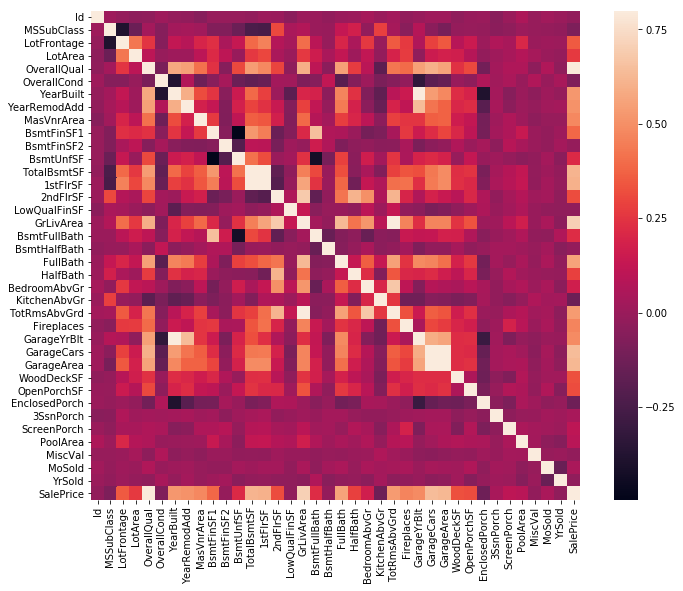

In [30]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)


We find Top 10 fetures have the most correlation with SalesPrice

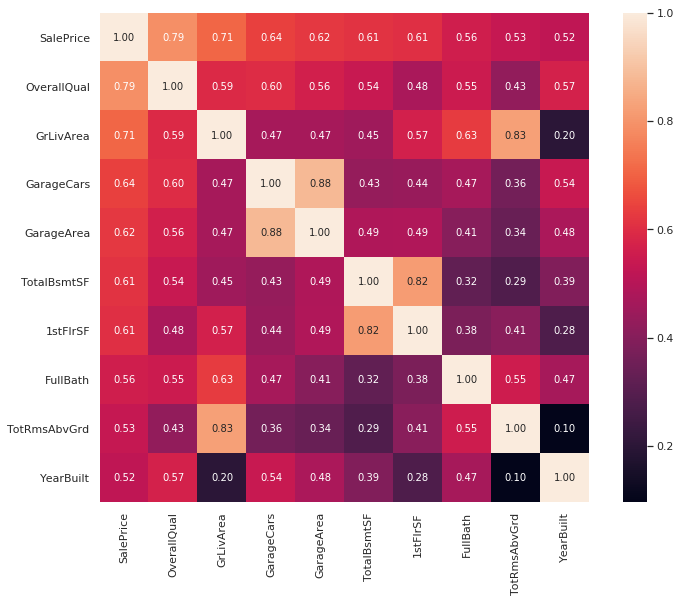

In [31]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.00)
f, hm = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


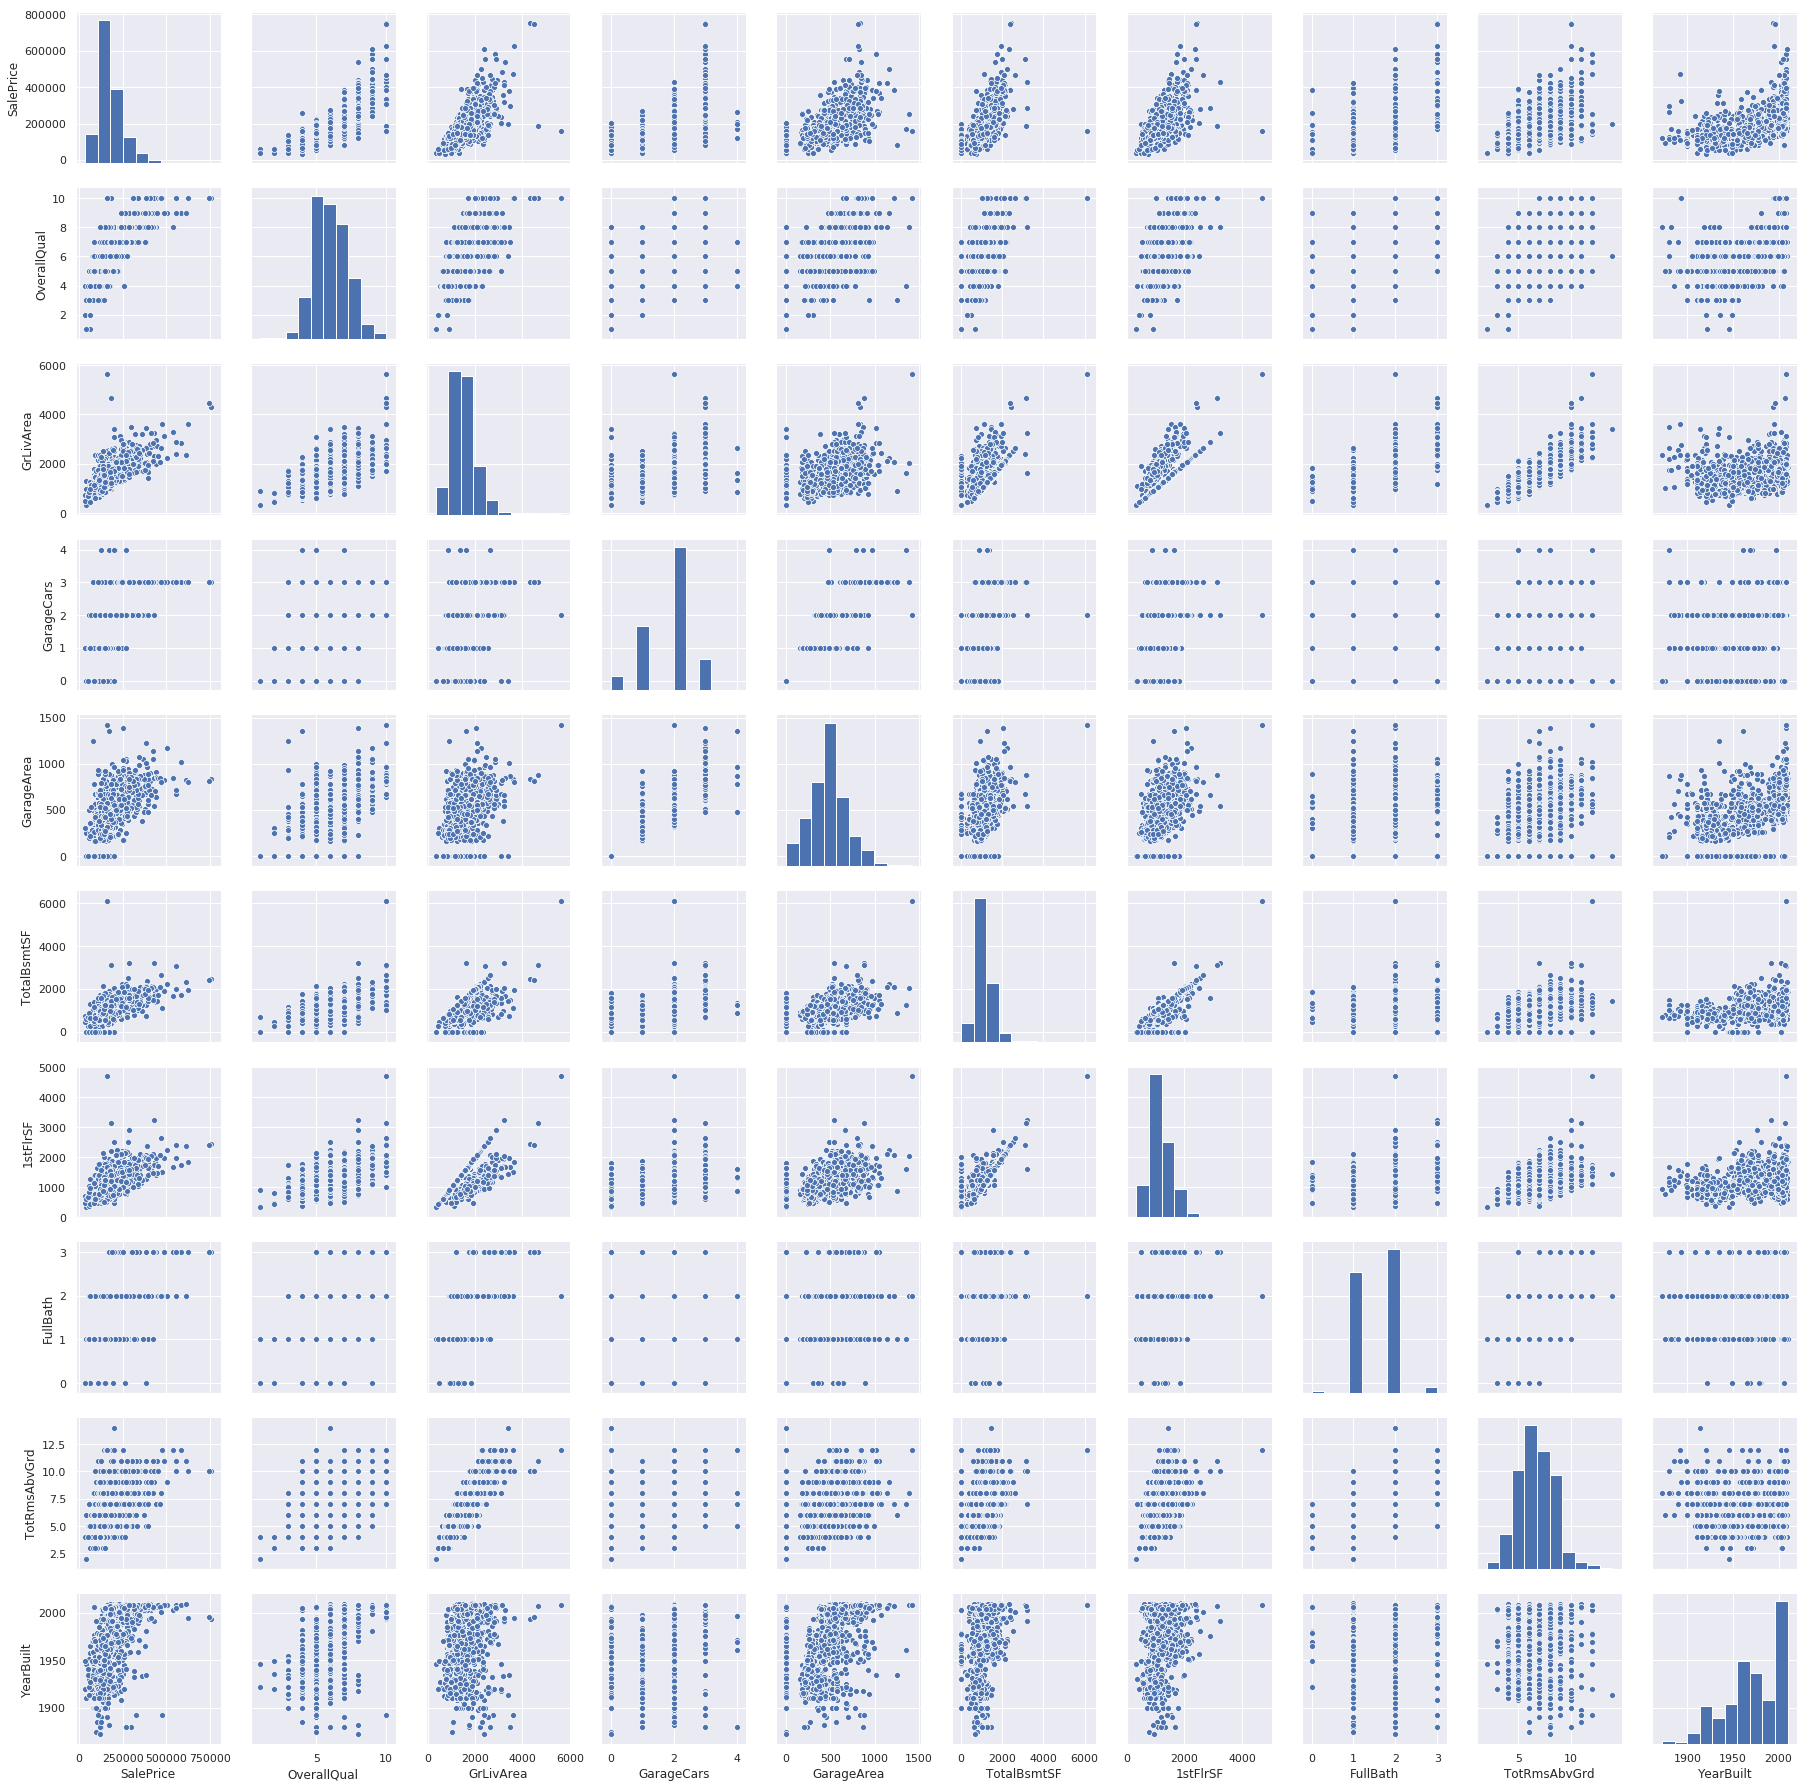

In [32]:
sns.pairplot(train_df[cols], size=2.5)

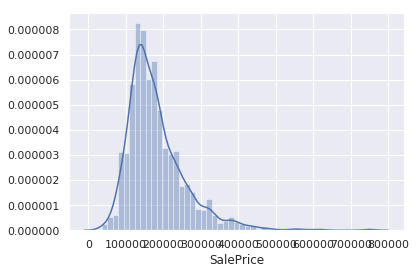

In [33]:
sns.distplot(train_df['SalePrice'])

In [0]:
# features = train_df['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
#        'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
#        'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
#        'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
#        'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
#        'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
#        'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
#        'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
#        'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
#        'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
#        'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
#        'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
#        'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
#        'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle',
#        'SaleCondition', 'SalePrice', 'SaleType', 'ScreenPorch', 'Street',
#        'TotRmsAbvGrd', 'TotalBsmtSF', 'Utilities', 'WoodDeckSF', 'YearBuilt',
#        'YearRemodAdd', 'YrSold']

We drop all features that are missing more than 15% of data

In [0]:
train_df.drop(['Utilities', 'RoofMatl', 'MasVnrArea', 'MasVnrType', 'Heating', 'LowQualFinSF',
            'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'Functional', 'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'WoodDeckSF',
            'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
            'MiscVal'], axis=1, inplace=True)

In [36]:
print(train_df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')


In [37]:
train_df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
LotConfig,Inside,FR2,Inside,Corner,FR2


We choose most important features for training the model

In [0]:
features = train_df[
    ['OverallQual', 'GrLivArea',
    'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
                  'TotRmsAbvGrd', 'YearBuilt',
    ]
]

In [0]:
t_features = test_df[
    ['OverallQual', 'GrLivArea',
    'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
                  'TotRmsAbvGrd', 'YearBuilt',
    ]
]

In [40]:
features.head().T

,0,1,2,3,4
OverallQual,7,6,7,7,8
GrLivArea,1710,1262,1786,1717,2198
GarageCars,2,2,2,3,3
TotalBsmtSF,856,1262,920,756,1145
1stFlrSF,856,1262,920,961,1145
FullBath,2,2,2,1,2
TotRmsAbvGrd,8,6,6,7,9
YearBuilt,2003,1976,2001,1915,2000


In [41]:
t_features.head().T

,0,1,2,3,4
OverallQual,5.0,6.0,5.0,6.0,8.0
GrLivArea,896.0,1329.0,1629.0,1604.0,1280.0
GarageCars,1.0,1.0,2.0,2.0,2.0
TotalBsmtSF,882.0,1329.0,928.0,926.0,1280.0
1stFlrSF,896.0,1329.0,928.0,926.0,1280.0
FullBath,1.0,1.0,2.0,2.0,2.0
TotRmsAbvGrd,5.0,6.0,6.0,7.0,5.0
YearBuilt,1961.0,1958.0,1997.0,1998.0,1992.0


In [42]:
features_nans = pd.concat([features.isnull().sum(), features.isnull().sum() / features.shape[0]], axis=1, keys=['Features', 'Percentage'])
print(features_nans[features_nans.sum(axis=1) > 0])

Empty DataFrame
Columns: [Features, Percentage]
Index: []


We check variable normality

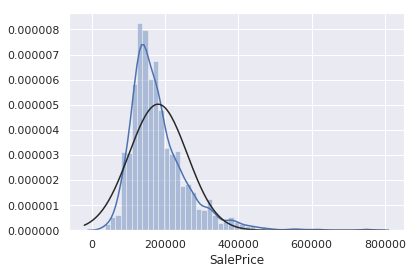

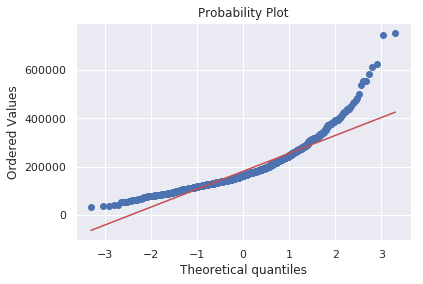

In [43]:
#histogram and normal probability plot
from scipy.stats import norm
sns.distplot(train_df['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

Not normal: we have right-skewness and the data is a bit peak-y

We will apply log transform to check how the normality will look like

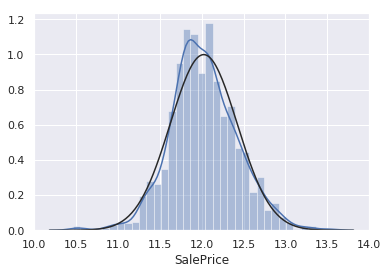

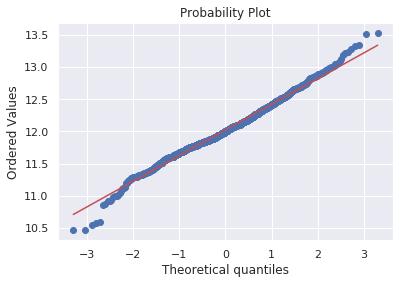

In [44]:
target_log = train_df['SalePrice'] = np.log(train_df['SalePrice'])
sns.distplot(train_df['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)

Much better fit! That should improve the regressions.

In [0]:
# target_log = np.log(target)

We split the data to training and test df

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_features, test_features, train_targets, test_targets = train_test_split(
    features, target_log, test_size=0.2, random_state=RANDOM_STATE)

In [48]:
for x in (train_features, test_features, train_targets, test_targets):
    print(x.shape)

(1168, 8)
(292, 8)
(1168,)
(292,)


We test Linear regression model

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

In [0]:
model.fit(train_features, train_targets);

In [52]:
model.intercept_

5.826263913915189

In [53]:
model.coef_

array([ 1.03187995e-01,  2.16978327e-04,  9.39347303e-02,  6.22059728e-05,
        6.13912587e-05, -1.57320018e-02,  5.58225923e-03,  2.49841234e-03])

In [54]:
coeff_df = pd.DataFrame(model.coef_, train_features.columns, columns=['Coefficient'])
coeff_df

,Coefficient
OverallQual,0.103188
GrLivArea,0.000217
GarageCars,0.093935
TotalBsmtSF,0.000062
1stFlrSF,0.000061
FullBath,-0.015732
TotRmsAbvGrd,0.005582
YearBuilt,0.002498


In [0]:
test_r2 = model.score(test_features, test_targets)

In [56]:
print ("R^2 is: \n", test_r2)

R^2 is: 
 0.8380273255707305


The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.

Our features explain approximately 84% of the variance in our target variable!

We find RMSE:

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [0]:
test_predictions = model.predict(test_features)

In [59]:
mean_absolute_error(test_targets, test_predictions)

0.12164534457146836

In [60]:
mean_squared_error(test_targets, test_predictions)

0.030226290635266842

In [0]:
test_rmse = np.sqrt(mean_squared_error(test_targets, test_predictions))

In [62]:
print ("RMSE is: \n", test_rmse)

RMSE is: 
 0.17385709831717208


The RMSE measures the distance between our predicted values and actual values.

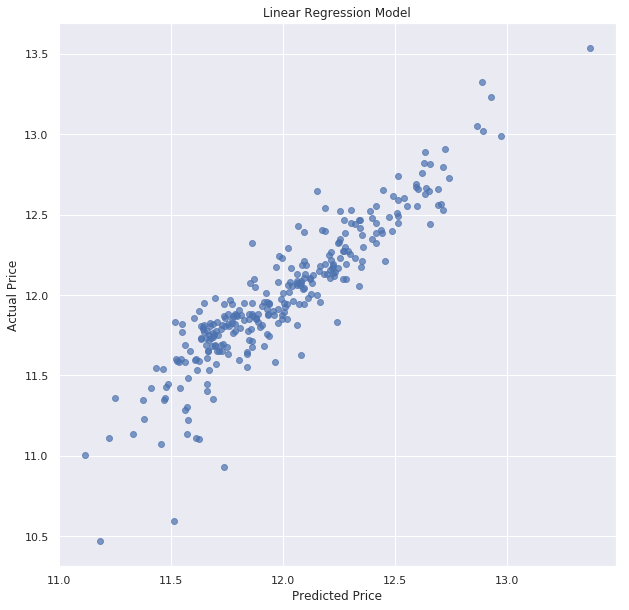

In [63]:
plt.figure(figsize=(10, 10))

actual_values = test_targets
plt.scatter(test_predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.savefig('pic.png', dpi=80)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

If our predicted values were identical to the actual values, this graph would be the straight line, no we see the some differences.

## Make a submission

In [0]:
submission = pd.DataFrame()
submission['Id'] = test_df.Id

In [0]:
# features = t_features.select_dtypes(
#         include=[np.number]).drop(['Id'], axis=1).interpolate()

In [0]:
# features = t_features.select_dtypes(
#         include=[np.number]).interpolate()

In [0]:
# features = t_features

In [0]:
# predictions = model.predict(features)

In [0]:
# final_predictions = np.exp(predictions)

In [0]:
# print ("Original predictions are: \n", predictions[:5], "\n")
# print ("Final predictions are: \n", final_predictions[:5])

Check the results:

In [0]:
# submission['SalePrice'] = final_predictions
# submission.head()

In [0]:
# submission.to_csv('submission1.csv', index=False)

## We test other models

Random forest

In [73]:
!pip install pydot

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rfc = RandomForestRegressor(n_estimators=100)

In [76]:
rfc.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [77]:
rfc.best_score

AttributeError: ignored

In [0]:
test_preds = rfc.predict(test_features)

In [79]:
print('coefficient of determination R^2 of the prediction: ', test_preds)

coefficient of determination R^2 of the prediction:  [11.84909244 12.65248682 11.62137017 12.00554963 12.62902834 11.27835596
 12.16905204 11.93782327 11.27726053 11.71875208 12.01760788 11.51054413
 11.4299557  12.31269905 12.1519647  11.71276716 12.18316595 11.77992982
 11.55715124 12.18201638 11.95402764 12.24085362 12.05293143 11.70517363
 12.12641834 12.04291411 12.26390884 11.49795138 12.14116616 12.26169099
 11.6472386  12.37116926 12.01253097 11.65024434 12.48381545 11.82074368
 11.96208161 12.23587653 12.63556859 11.52387555 11.74882104 12.36385441
 11.67696415 12.85122314 11.82017022 11.89671567 11.75065178 11.73596669
 12.98283198 11.9025991  11.72738462 12.11105472 11.67319827 12.75998922
 11.87669474 12.40670844 12.20093414 11.94376973 11.93259463 11.49724259
 11.28025239 11.84166788 12.67746552 12.53461156 12.4660917  12.3423993
 11.59283213 12.66213423 11.67518002 12.02918118 11.75827015 11.81989698
 11.64382503 11.43402353 13.06508331 12.05710791 12.66991821 12.53947428

In [0]:
test_rmse = np.sqrt(mean_squared_error(test_targets, test_preds))

In [81]:
test_targets.head(5)

892     11.947949
1105    12.691580
413     11.652687
522     11.976659
1036    12.661914
Name: SalePrice, dtype: float64

In [82]:
test_preds[0:5]

array([11.84909244, 12.65248682, 11.62137017, 12.00554963, 12.62902834])

In [83]:
mean_squared_error(test_targets, test_preds)

0.028590727416824842

In [84]:
test_rmse

0.16908792806355172

In [85]:
print('Mean squared error: %.2f'% mean_squared_error(test_targets, test_preds))

Mean squared error: 0.03


Next steps:
1. delete all not necessary data
2. start with the steps using DL

In [0]:
rfc = RandomForestRegressor(n_estimators=10)

In [88]:
rfc.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
test_preds = rfc.predict(test_features)

In [0]:
test_rmse = np.sqrt(mean_squared_error(test_targets, test_preds))

In [91]:
mean_squared_error(test_targets, test_preds)

0.029619564643755945

In [92]:
test_rmse

0.17210335453952066

Estimators 50

In [0]:
rfc = RandomForestRegressor(n_estimators=50)

In [98]:
rfc.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
test_preds = rfc.predict(test_features)

In [0]:
test_rmse = np.sqrt(mean_squared_error(test_targets, test_preds))

In [101]:
mean_squared_error(test_targets, test_preds)

0.028770119239687777

In [102]:
test_rmse

0.16961756760338176

Estimators 200

In [0]:
rfc = RandomForestRegressor(n_estimators=200)

In [104]:
rfc.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
test_preds = rfc.predict(test_features)

In [0]:
test_rmse = np.sqrt(mean_squared_error(test_targets, test_preds))

In [107]:
mean_squared_error(test_targets, test_preds)

0.02897936999514249

In [108]:
test_rmse

0.1702332811031453

Summary: best score with Random Forests are with 50 estimators: 17% RMSE

## DL model

## Creating the submission file